In [16]:
!pip install boruta
!pip install xgboost

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import matplotlib
from boruta import BorutaPy
from sklearn import model_selection
from scipy import stats
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.lines as mlines

In [18]:
df=pd.read_csv('Dataset-Final.csv')

#### Original Dataframe

In [19]:
df

,Test no.,Shape,Steel,Fy,LB,KL/r,w/t ot d/t,E/fy,Lambda,Design State(Global Buckling),Design State(LocalBuckling),Design State(At Fracture point),Fracture life,Fractural Strain,Energy life(N.m)
0,HSS1-1,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.3,1.85,2.7,32.21,0.010790,292836.18
1,HSS1-2,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,1.0,2.50,0.3,32.21,0.010790,292836.18
2,HSS1-3c,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.3,2.10,2.8,32.21,0.010790,292836.18
3,HSS1-4,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.4,2.70,3.8,32.21,0.010790,292836.18
4,HSS1-5,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.9,7.90,2.0,32.21,0.010790,292836.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,SOC2,H-50x50x6x6,SS-41,289.0,1970.0,78.71,8.1,691.9,0.953,NaN,NaN,NaN,52.25,0.001445,538087.28
412,SOC3,H-50x50x6x6,SS-41,257.0,2968.0,120.43,12.4,778.0,1.375,NaN,NaN,NaN,37.56,0.001285,390534.64
413,RHS1,RHS 150x100x6,AS1163-C350,449.0,2064.0,79.98,18.8,445.3,1.207,NaN,NaN,NaN,24.85,0.002245,203177.04
414,RHS2,RHS 150x100x6,AS1163-C350,449.0,1388.0,59.97,14.1,445.3,0.905,NaN,NaN,NaN,30.84,0.002245,245464.20


#### Impute Values to replace NaN

In [20]:
trainingData = df.iloc[:, :].values
dataset = df.iloc[:, :].values

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(trainingData[:, 9:12])
dataset[:, 9:12] = imputer.transform(dataset[:, 9:12])

In [22]:
x=[]
y=[]
z=[]
for i in range(len(dataset[:,9])):
    x.append(dataset[i][9])
    y.append(dataset[i][10])
    z.append(dataset[i][11])

In [23]:
df.insert(10, "Imputed Design State(GB)", x)
df.insert(12, "Imputed Design State(LB)", y)
df.insert(14, "Imputed Design State(FP)", z)

In [24]:
df=np.round(df, decimals=3)

In [25]:
df

,Test no.,Shape,Steel,Fy,LB,KL/r,w/t ot d/t,E/fy,Lambda,Design State(Global Buckling),Imputed Design State(GB),Design State(LocalBuckling),Imputed Design State(LB),Design State(At Fracture point),Imputed Design State(FP),Fracture life,Fractural Strain,Energy life(N.m)
0,HSS1-1,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.3,0.300,1.85,1.850,2.7,2.700,32.21,0.011,292836.18
1,HSS1-2,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,1.0,1.000,2.50,2.500,0.3,0.300,32.21,0.011,292836.18
2,HSS1-3c,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.3,0.300,2.10,2.100,2.8,2.800,32.21,0.011,292836.18
3,HSS1-4,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.4,0.400,2.70,2.700,3.8,3.800,32.21,0.011,292836.18
4,HSS1-5,HSS102x102x6.4,ASTM A500 Grade B,460.0,2985.0,77.00,14.2,434.7,1.180,0.9,0.900,7.90,7.900,2.0,2.000,32.21,0.011,292836.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,SOC2,H-50x50x6x6,SS-41,289.0,1970.0,78.71,8.1,691.9,0.953,NaN,0.497,NaN,1.258,NaN,2.384,52.25,0.001,538087.28
412,SOC3,H-50x50x6x6,SS-41,257.0,2968.0,120.43,12.4,778.0,1.375,NaN,0.497,NaN,1.258,NaN,2.384,37.56,0.001,390534.64
413,RHS1,RHS 150x100x6,AS1163-C350,449.0,2064.0,79.98,18.8,445.3,1.207,NaN,0.497,NaN,1.258,NaN,2.384,24.85,0.002,203177.04
414,RHS2,RHS 150x100x6,AS1163-C350,449.0,1388.0,59.97,14.1,445.3,0.905,NaN,0.497,NaN,1.258,NaN,2.384,30.84,0.002,245464.20


#### Normalizing 'Energy Life' using Z-score normalization

In [26]:
el = df[['Fy', 'LB','KL/r','w/t ot d/t','E/fy','Lambda','Imputed Design State(GB)','Imputed Design State(LB)','Imputed Design State(FP)','Fracture life','Fractural Strain','Energy life(N.m)']].values

In [63]:
scaler = StandardScaler()
ss = scaler.fit_transform(pd.DataFrame(el))
features=['Fy', 'LB','KL/r','w/t ot d/t','E/fy','Lambda','Imputed Design State(GB)','Imputed Design State(LB)','Imputed Design State(FP)','Fracture life','Fractural Strain','Energy life(N.m)']

In [64]:
df1 = pd.DataFrame(ss, columns=features)

In [65]:
df1

,Fy,LB,KL/r,w/t ot d/t,E/fy,Lambda,Imputed Design State(GB),Imputed Design State(LB),Imputed Design State(FP),Fracture life,Fractural Strain,Energy life(N.m)
0,0.954612,0.151195,0.153002,0.140877,-0.883532,0.473590,-0.337260,0.910551,0.351973,-0.519874,-0.425052,-0.448335
1,0.954612,0.151195,0.153002,0.140877,-0.883532,0.473590,0.861902,1.910522,-2.322422,-0.519874,-0.425052,-0.448335
2,0.954612,0.151195,0.153002,0.140877,-0.883532,0.473590,-0.337260,1.295155,0.463406,-0.519874,-0.425052,-0.448335
3,0.954612,0.151195,0.153002,0.140877,-0.883532,0.473590,-0.165951,2.218206,1.577738,-0.519874,-0.425052,-0.448335
4,0.954612,0.151195,0.153002,0.140877,-0.883532,0.473590,0.690593,10.217976,-0.428059,-0.519874,-0.425052,-0.448335
...,...,...,...,...,...,...,...,...,...,...,...,...
411,-1.011743,-0.689258,0.209899,-0.603895,0.927352,-0.063605,0.000218,-0.000192,-0.000155,0.339173,-0.812139,0.238287
412,-1.379716,0.137119,1.598065,-0.078891,1.533562,0.935057,0.000218,-0.000192,-0.000155,-0.290538,-0.812139,-0.174812
413,0.828122,-0.611423,0.252156,0.702509,-0.808900,0.537485,0.000218,-0.000192,-0.000155,-0.835372,-0.773430,-0.699351
414,0.828122,-1.171173,-0.413644,0.128668,-0.808900,-0.177197,0.000218,-0.000192,-0.000155,-0.578601,-0.773430,-0.580961


#### Normalizing 'Energy Life' using Min-Max Normalization

In [30]:
scaler = MinMaxScaler()
ss = scaler.fit_transform(pd.DataFrame(el))

In [31]:
df2 = pd.DataFrame(ss, columns=features)

In [32]:
df2

,Fy,LB,KL/r,w/t ot d/t,E/fy,Lambda,Imputed Design State(GB),Imputed Design State(LB),Imputed Design State(FP),Fracture life,Fractural Strain,Energy life(N.m)
0,0.628998,0.348908,0.280612,0.228797,0.117461,0.325088,0.038997,0.215305,0.346591,0.215807,0.075188,0.134123
1,0.628998,0.348908,0.280612,0.228797,0.117461,0.325088,0.136490,0.299611,0.005682,0.215807,0.075188,0.134123
2,0.628998,0.348908,0.280612,0.228797,0.117461,0.325088,0.038997,0.247730,0.360795,0.215807,0.075188,0.134123
3,0.628998,0.348908,0.280612,0.228797,0.117461,0.325088,0.052925,0.325551,0.502841,0.215807,0.075188,0.134123
4,0.628998,0.348908,0.280612,0.228797,0.117461,0.325088,0.122563,1.000000,0.247159,0.215807,0.075188,0.134123
...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.264392,0.208598,0.289337,0.108481,0.409438,0.244876,0.066435,0.138521,0.301705,0.392184,0.000000,0.254369
412,0.196162,0.346558,0.502194,0.193294,0.507180,0.393993,0.066435,0.138521,0.301705,0.262894,0.000000,0.182024
413,0.605544,0.221592,0.295816,0.319527,0.129494,0.334629,0.066435,0.138521,0.301705,0.151030,0.007519,0.090163
414,0.605544,0.128145,0.193724,0.226824,0.129494,0.227915,0.066435,0.138521,0.301705,0.203749,0.007519,0.110896


#### Plotting the Feature Correlation Heatmap

Text(0.5, 1.0, 'Seaborn')

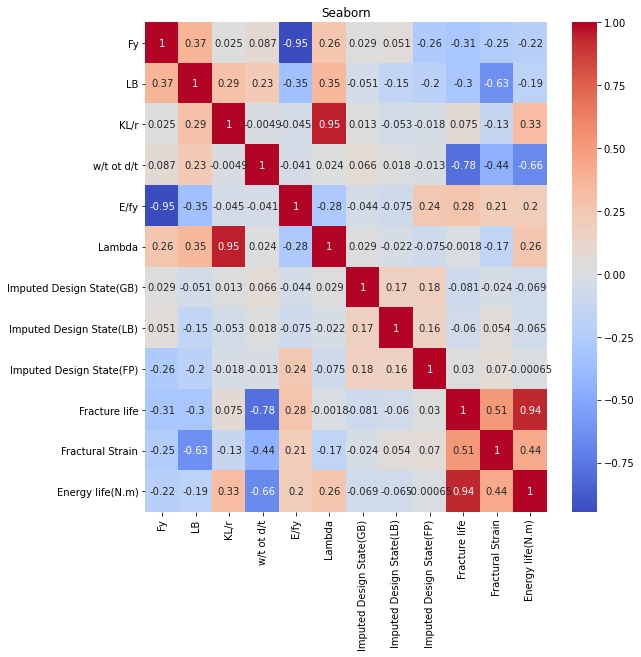

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

#### Plotting Feature Importance Graph based on F scores

In [31]:
X=df2[['w/t ot d/t','E/fy','Lambda']]
y=df2['Fracture life']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.008040


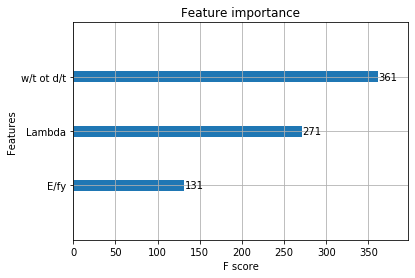

In [32]:
plot_importance(xg_reg)
plt.show()

In [35]:
y=df2['Energy life(N.m)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.013006


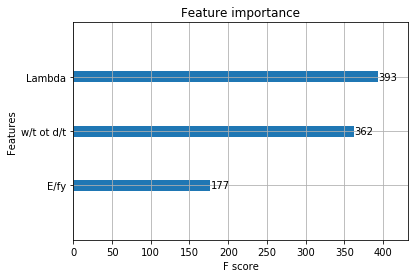

In [36]:
plot_importance(xg_reg)
plt.show()

In [37]:
X=df2[['w/t ot d/t','E/fy','Lambda']]
y=df2['Imputed Design State(GB)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.091283


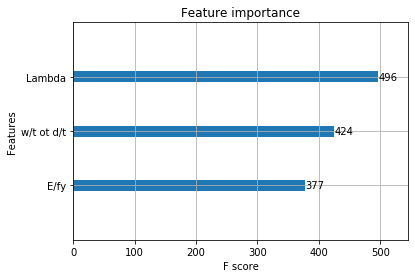

In [38]:
plot_importance(xg_reg)
plt.show()

In [42]:
X=df2[['w/t ot d/t','E/fy','Lambda']]
y=df2['Imputed Design State(LB)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.071234


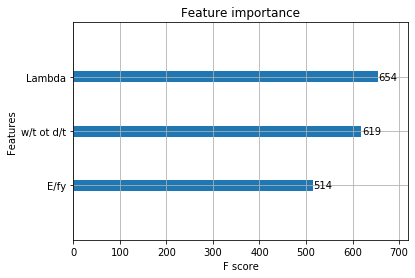

In [43]:
plot_importance(xg_reg)
plt.show()

In [44]:
X=df2[['w/t ot d/t','E/fy','Lambda']]
y=df2['Fractural Strain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.132890


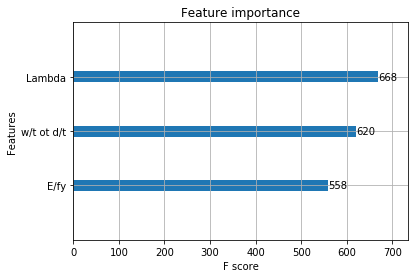

In [45]:
plot_importance(xg_reg)
plt.show()

#### Feature Selection using Boruta

In [68]:
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Energy life(N.m)']
def greedy_elim():

    # do feature selection using boruta
    model = RandomForestRegressor(n_jobs= 4,oob_score= True)
    #model = LinearRegression()
    # define Boruta feature selection method
   # feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features - 5 features should be selected
    #feat_selector.fit(X, y)
    # 150 features seems to be the best at the moment. Why this is is unclear.
    feat_selector = BorutaPy(estimator=model, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features
    feat_selector.fit_transform(X.values, y.values)

    # check selected features
    features_bool = np.array(feat_selector.support_)
    print (features_bool)
    features = np.array(X.columns)
    print (features)
    result = features[features_bool]
    print(result)

    # check ranking of features
    features_rank = feat_selector.ranking_
    #print(features_rank)
    rank = features_rank[features_bool]
    #print(rank)
   
    

    return result

In [69]:
greedy_elim()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	0
Iteration: 	17 / 

array(['KL/r', 'w/t ot d/t', 'Lambda'], dtype=object)

####  Recursive Feature Elimination

#### Energy-Life - [w/t and Lambda]

In [48]:
parameter = ['Fy','KL/r','w/t ot d/t','E/fy','Lambda']
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Energy life(N.m)']
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit RFE
rfe.fit(X, y)
# summarize all features
print("Feature Selection Results for Energy Life:")
for i in range(X.shape[1]):
	print('Parameter Name: %s ==> Selected: %s, Rank: %.3f' % (parameter[i], rfe.support_[i], rfe.ranking_[i]))

Feature Selection Results for Energy Life:
Parameter Name: Fy ==> Selected: False, Rank: 3.000
Parameter Name: KL/r ==> Selected: False, Rank: 2.000
Parameter Name: w/t ot d/t ==> Selected: True, Rank: 1.000
Parameter Name: E/fy ==> Selected: False, Rank: 4.000
Parameter Name: Lambda ==> Selected: True, Rank: 1.000


#### Fracture Life - [w/t and Lambda]

In [49]:
parameter = ['Fy','KL/r','w/t ot d/t','E/fy','Lambda']
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Fracture life']
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit RFE
rfe.fit(X, y)
# summarize all features
print("Feature Selection Results for Fracture Life:")
for i in range(X.shape[1]):
	print('Parameter Name: %s ==> Selected: %s, Rank: %.3f' % (parameter[i], rfe.support_[i], rfe.ranking_[i]))

Feature Selection Results for Fracture Life:
Parameter Name: Fy ==> Selected: False, Rank: 3.000
Parameter Name: KL/r ==> Selected: False, Rank: 2.000
Parameter Name: w/t ot d/t ==> Selected: True, Rank: 1.000
Parameter Name: E/fy ==> Selected: False, Rank: 4.000
Parameter Name: Lambda ==> Selected: True, Rank: 1.000


#### Imputed Design State (Global Buckling) - [Fy and Lambda]

In [50]:
parameter = ['Fy','KL/r','w/t ot d/t','E/fy','Lambda']
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Imputed Design State(GB)']
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit RFE
rfe.fit(X, y)
# summarize all features
print("Feature Selection Results for Fracture Life:")
for i in range(X.shape[1]):
	print('Parameter Name: %s ==> Selected: %s, Rank: %.3f' % (parameter[i], rfe.support_[i], rfe.ranking_[i]))

Feature Selection Results for Fracture Life:
Parameter Name: Fy ==> Selected: True, Rank: 1.000
Parameter Name: KL/r ==> Selected: False, Rank: 4.000
Parameter Name: w/t ot d/t ==> Selected: False, Rank: 2.000
Parameter Name: E/fy ==> Selected: False, Rank: 3.000
Parameter Name: Lambda ==> Selected: True, Rank: 1.000


#### Imputed Design State (Local Buckling) - [Fy and Lambda]

In [51]:
parameter = ['Fy','KL/r','w/t ot d/t','E/fy','Lambda']
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Imputed Design State(LB)']
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit RFE
rfe.fit(X, y)
# summarize all features
print("Feature Selection Results for Fracture Life:")
for i in range(X.shape[1]):
	print('Parameter Name: %s ==> Selected: %s, Rank: %.3f' % (parameter[i], rfe.support_[i], rfe.ranking_[i]))

Feature Selection Results for Fracture Life:
Parameter Name: Fy ==> Selected: False, Rank: 3.000
Parameter Name: KL/r ==> Selected: False, Rank: 4.000
Parameter Name: w/t ot d/t ==> Selected: True, Rank: 1.000
Parameter Name: E/fy ==> Selected: False, Rank: 2.000
Parameter Name: Lambda ==> Selected: True, Rank: 1.000


##### Fractural Strain [ w/t and KL/r ]

In [52]:
parameter = ['Fy','KL/r','w/t ot d/t','E/fy','Lambda']
X=df2[['Fy','KL/r','w/t ot d/t','E/fy','Lambda']]
y=df2['Fractural Strain']
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit RFE
rfe.fit(X, y)
# summarize all features
print("Feature Selection Results for Fracture Life:")
for i in range(X.shape[1]):
	print('Parameter Name: %s ==> Selected: %s, Rank: %.3f' % (parameter[i], rfe.support_[i], rfe.ranking_[i]))

Feature Selection Results for Fracture Life:
Parameter Name: Fy ==> Selected: False, Rank: 4.000
Parameter Name: KL/r ==> Selected: True, Rank: 1.000
Parameter Name: w/t ot d/t ==> Selected: True, Rank: 1.000
Parameter Name: E/fy ==> Selected: False, Rank: 2.000
Parameter Name: Lambda ==> Selected: False, Rank: 3.000


#### Outlier Detection

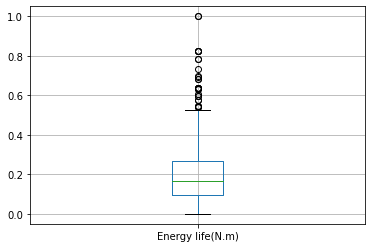

In [47]:
df2.boxplot('Energy life(N.m)')

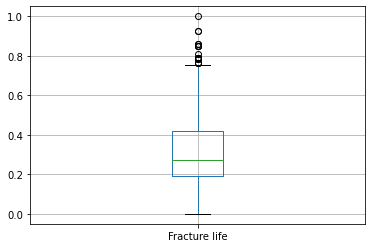

In [46]:
df2.boxplot('Fracture life')

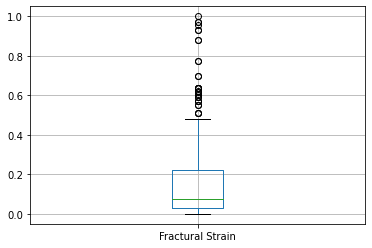

In [41]:
df2.boxplot('Fractural Strain')

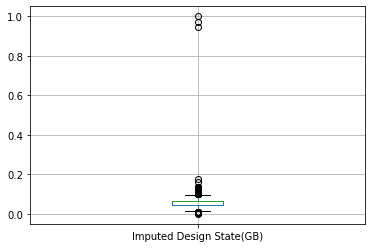

In [42]:
df2.boxplot('Imputed Design State(GB)')

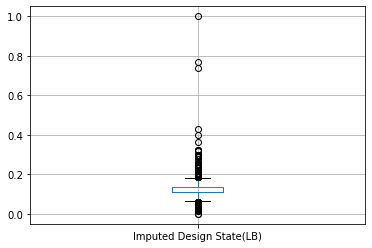

In [57]:
df2.boxplot('Imputed Design State(LB)')

#### Predictions

#### Linear Regression Model

Pearson Correlation Coeff: 0.7574288899591604
MAE: 0.08058991181704835
RMSE: 0.11137260029427314


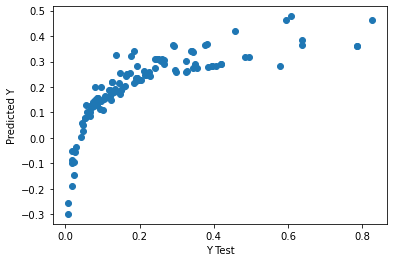

In [62]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Energy life(N.m)']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.8122102721254947
MAE: 0.09289182482265591
RMSE: 0.12056360862151154


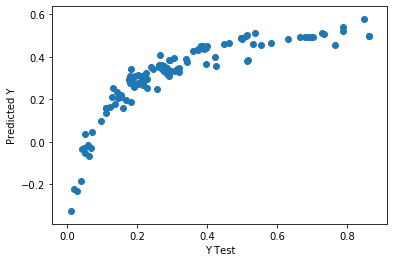

In [54]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fracture life']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.42401173371433565
MAE: 0.12489581890360801
RMSE: 0.17850095828650525


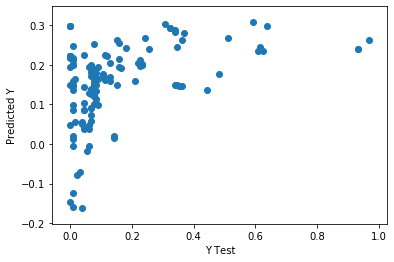

In [55]:
#X=df[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fractural Strain']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: -0.026275116156036143
MAE: 0.022382554124074333
RMSE: 0.030243269725834923


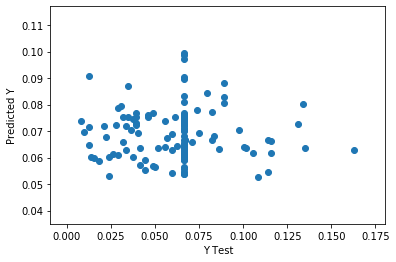

In [88]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(GB)']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.1385249034689039
MAE: 0.03435434563210514
RMSE: 0.05223659990505976


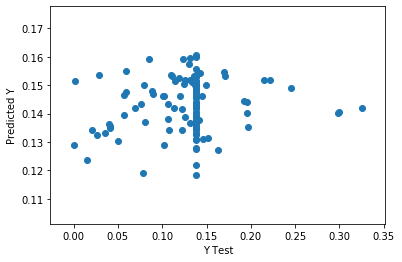

In [90]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(LB)']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Decision Tree Regression

Pearson Correlation Coeff: 0.9909848162431264
MAE: 0.010061906624478508
RMSE: 0.022861084979607846


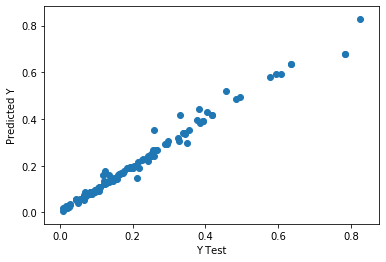

In [57]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Energy life(N.m)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.9977207125978655
MAE: 0.006453558645778324
RMSE: 0.014708884445658675


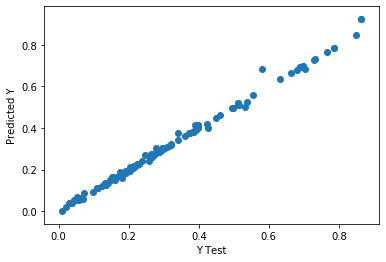

In [58]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fracture life']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.6309989224701438
MAE: 0.06100250626566417
RMSE: 0.16245199540939745


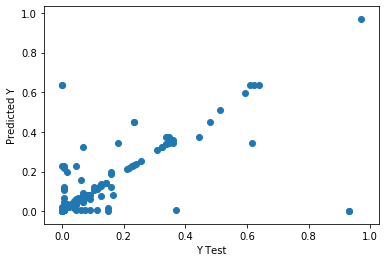

In [59]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fractural Strain']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.07457570938047257
MAE: 0.03271453110492107
RMSE: 0.08464548653241236


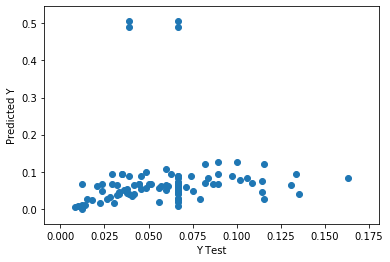

In [60]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(GB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.4121907337343108
MAE: 0.0647857328145266
RMSE: 0.12469752151763386


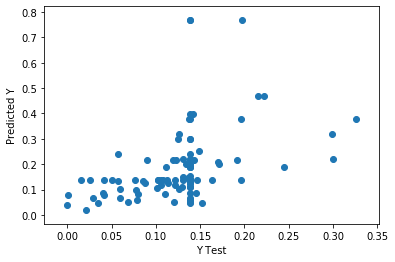

In [91]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(LB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Bagging Regression Model 

Pearson Correlation Coeff: 0.995784833417621
MAE: 0.00845438508302906
RMSE: 0.01694734705706287


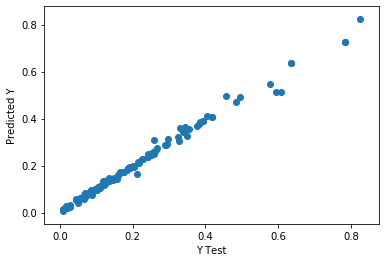

In [62]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Energy life(N.m)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.9984276397058047
MAE: 0.005804306141608238
RMSE: 0.011571521532402793


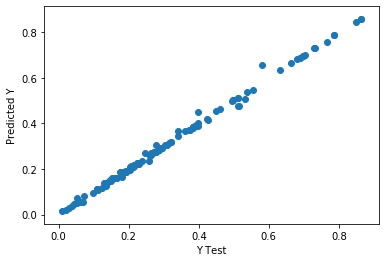

In [63]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fracture life']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.7893138738985963
MAE: 0.05817186466165418
RMSE: 0.12074253602254963


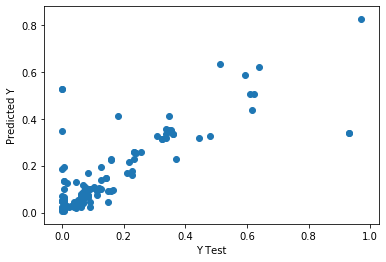

In [64]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fractural Strain']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.08243781538892819
MAE: 0.03265261026372067
RMSE: 0.07543374712980047


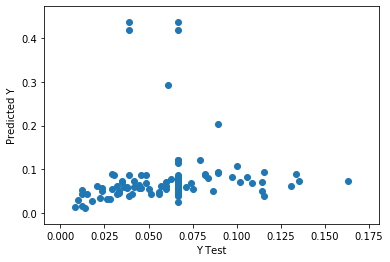

In [65]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(GB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.5312833886289116
MAE: 0.04617579085469513
RMSE: 0.06681691228250883


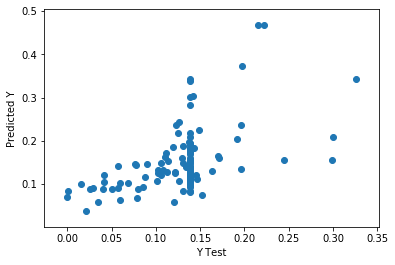

In [89]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(LB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Support Vector Machine Regression Model

Pearson Correlation Coeff: 0.9440706388092996
MAE: 0.05262580424049308
RMSE: 0.06302518388938687


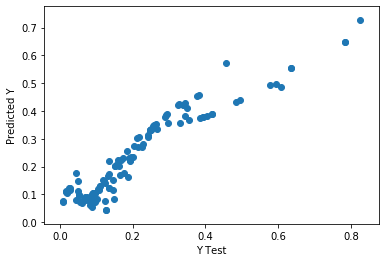

In [66]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Energy life(N.m)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.9654508200140157
MAE: 0.05739784337034907
RMSE: 0.06626705181301411


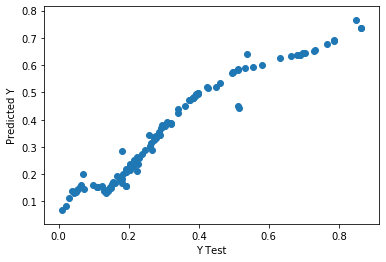

In [67]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fracture life']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.4809509824428446
MAE: 0.11877089653213099
RMSE: 0.17335895407594806


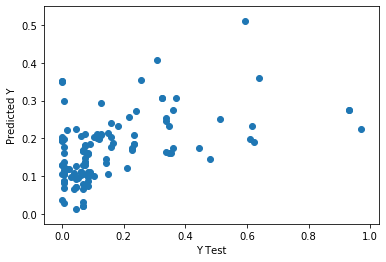

In [68]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fractural Strain']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.20801536150751213
MAE: 0.04155315808920268
RMSE: 0.04986155017145172


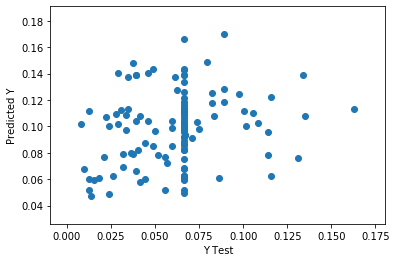

In [69]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(GB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.2923770871520144
MAE: 0.04969462510619558
RMSE: 0.06004211919225565


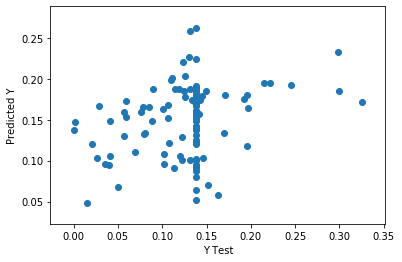

In [92]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(LB)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Gradient Boosting Regression Model

Pearson Correlation Coeff: 0.9965030927328391
MAE: 0.008300922564616241
RMSE: 0.014437078212155499


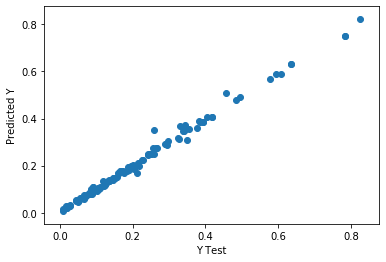

In [75]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Energy life(N.m)']
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model=GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.9990860717274452
MAE: 0.005415686367543414
RMSE: 0.009005203117765242


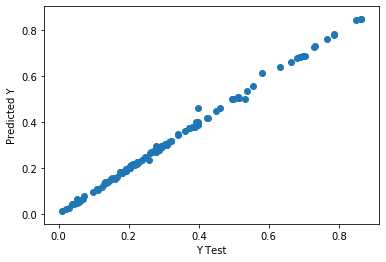

In [71]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fracture life']
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model=GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.8214151607848499
MAE: 0.06495982953146674
RMSE: 0.1128389934890859


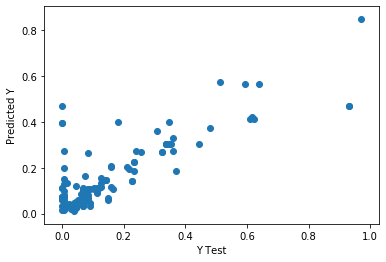

In [72]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Fractural Strain']
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model=GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.06431559570595524
MAE: 0.03324484423205429
RMSE: 0.07756063411446203


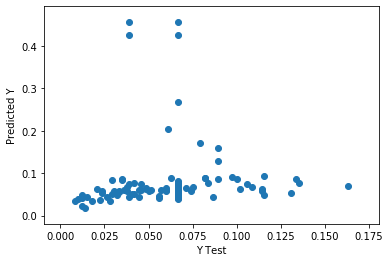

In [73]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(GB)']
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model=GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Pearson Correlation Coeff: 0.48333082553623513
MAE: 0.045347709150912414
RMSE: 0.0719432405366641


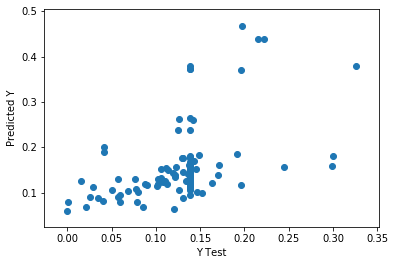

In [93]:
X=df2[['KL/r','w/t ot d/t','Lambda']]
y=df2['Imputed Design State(LB)']
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=123)
model=GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print('Pearson Correlation Coeff:', stats.pearsonr(y_test,predictions)[0])
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()